In [17]:
from datetime import datetime, date, time, timedelta
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
n = 2
dist = 963 * n
kml_G = 13.0
price_LG = 7.9
kml_E = 11.5
price_LE = 5.7
capacity = 50

### Fuel calculations
* `Autonomy (Km)`: The distance the car can go when the tank is full
* `Km/autonomy`: The ratio between the distance and the autonomy
* `L/100 Km`: Liters per 100 Km
* `R$/Km`: The cost per Km
* `R$/fill`: The cost to get the tank full
* `R$/100 Km`: The cost to go 100 Km
* `Volume (L)`: The amount of fuel needed
* `Cost (R$)`: The cost of the fuel
* `R$ ratio`: Price ratio between the fuels
* `Km ratio`: Km ration each fuel can go

In [19]:
df_fuel = pd.DataFrame(
	{
		'Fuel'				: ['Gasoline', 'Ethanol'],
		'R$/L'				: [price_LG, price_LE],
		'Km/L'				: [kml_G, kml_E]
	}
)

df_fuel['Autonomy (Km)']	= capacity * df_fuel['Km/L']
df_fuel['Km/autonomy']		= round(dist / df_fuel['Autonomy (Km)'], 1)
df_fuel['L/100 Km'] 		= round(100 / df_fuel['Km/L'], 1)
df_fuel['R$/Km']			= round(df_fuel['R$/L'] / df_fuel['Km/L'], 2)
df_fuel['R$/fill']			= round(df_fuel['R$/L'] * capacity, 2)
df_fuel['R$/100 Km']		= round(df_fuel['R$/L'] * df_fuel['L/100 Km'], 2)
df_fuel['Volume (L)']		= round(dist / df_fuel['Km/L'], 1)
df_fuel['Cost (R$)']		= round(df_fuel['R$/L'] * df_fuel['Volume (L)'], 2)
df_fuel['R$ ratio']			= [round(price_LG / price_LE, 3), round(price_LE / price_LG, 3)]
df_fuel['Km ratio']			= [round(kml_G / kml_E, 3), round(kml_E / kml_G, 3)]

In [20]:
one_way = int(dist / n)
avg_speed = 80

### Trip calculations
* `Distance (Km)`: Trip distance
* `AVG speed (Km/h)`: Average trip speed
* `Departure time`: Date and time the trip starts
* `Arrival time`: Estimated date and time the trip ends
* `Elapsed time`: Trip total duration
* `Elapsed time hh:mm:ss`: Trip total duration in the format hh:mm:ss

In [21]:
df_trip = pd.DataFrame(
	{
		'Distance (Km)'		: [one_way],
		'AVG speed (Km/h)'	: [avg_speed],
		# 'Departure time'	: [datetime.combine(datetime(2022, 4, 28), time(7, 0, 0))]
		'Departure time'	: [datetime.combine(date.today(), time(7, 0, 0))]
	}
)
df_trip['Arrival time'] = df_trip['Departure time'] + timedelta(seconds = int((df_trip['Distance (Km)'] / df_trip['AVG speed (Km/h)']) * 3600))
df_trip['Elapsed time'] = df_trip['Arrival time'] - df_trip['Departure time']
df_time = pd.to_timedelta(df_trip['Elapsed time']).dt.components[['days', 'hours', 'minutes', 'seconds']]
df_time['hours'] = df_time['hours'].add(df_time.pop('days') * 24)
df_trip['Elapsed time hh:mm:ss'] = df_time.astype(str).agg(lambda s: ':'.join(s.str.zfill(2)), axis=1)

### Fuel costs

In [22]:
print ('Fuel costs')
print ('Tank capacity:', capacity, 'L | Distance:', dist, 'Km')
df_fuel

Fuel costs
Tank capacity: 50 L | Distance: 1926 Km


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
0,Gasoline,7.9,13.0,650.0,3.0,7.7,0.61,395.0,60.83,148.2,1170.78,1.386,1.130
1,Ethanol,5.7,11.5,575.0,3.3,8.7,0.50,285.0,49.59,167.5,954.75,0.722,0.885


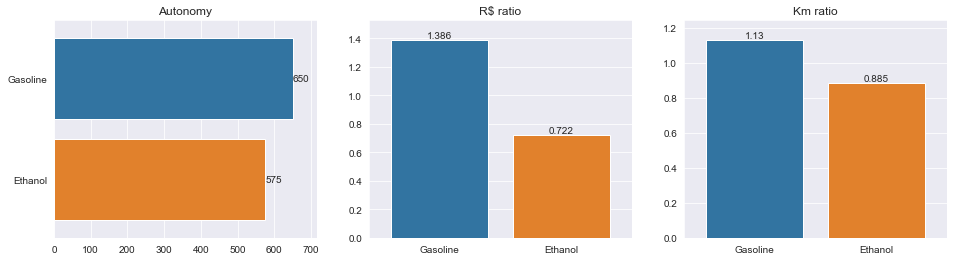

In [23]:
sns.set_style("darkgrid")
sns.color_palette("bright")

fig, axs = plt.subplots(1, 3, figsize=(16, 4))

sns.barplot(data=df_fuel, y="Fuel", x='Autonomy (Km)', ax=axs[0])
sns.barplot(data=df_fuel, x="Fuel", y='R$ ratio', ax=axs[1])
sns.barplot(data=df_fuel, x="Fuel", y='Km ratio', ax=axs[2])

for i in range(len(axs)):
	if i == 0:
		t ='Autonomy'
	elif i == 1:
		t = 'R$ ratio'
	elif i == 2:
		t = 'Km ratio'
	axs[i].set(xlabel=None, ylabel=None, title=t)
	axs[i].bar_label(axs[i].containers[0])
	axs[i].margins(x=0.1, y=0.1)

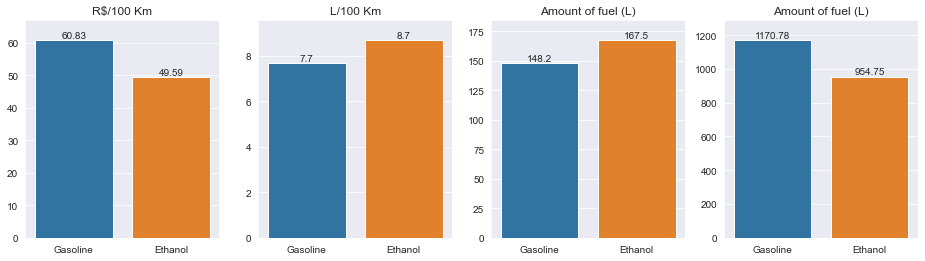

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

sns.barplot(data=df_fuel, x="Fuel", y='R$/100 Km', ax=axs[0])
sns.barplot(data=df_fuel, x="Fuel", y='L/100 Km', ax=axs[1])
sns.barplot(data=df_fuel, x="Fuel", y='Volume (L)', ax=axs[2])
sns.barplot(data=df_fuel, x="Fuel", y='Cost (R$)', ax=axs[3])

for i in range(len(axs)):
	if i == 0:
		t ='R$/100 Km'
	elif i == 1:
		t = 'L/100 Km'
	elif i == 2:
		t = 'Amount of fuel (L)'
	elif i == 3:
		t = 'Amount of fuel (L)'
	axs[i].set(xlabel=None, ylabel=None, title=t)
	axs[i].bar_label(axs[i].containers[0])
	axs[i].margins(y=0.1)

### Information

In [25]:
print('Trip calculations')
df_trip

Trip calculations


,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,963,80,2022-05-06 07:00:00,2022-05-06 19:02:15,0 days 12:02:15,12:02:15


In [26]:
print("Fuel's lowest value")
df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].min()]

Fuel's lowest value


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
1,Ethanol,5.7,11.5,575.0,3.3,8.7,0.5,285.0,49.59,167.5,954.75,0.722,0.885


In [27]:
print("Fuel's highest value")
df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].max()]

Fuel's highest value


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
0,Gasoline,7.9,13.0,650.0,3.0,7.7,0.61,395.0,60.83,148.2,1170.78,1.386,1.13


In [28]:
print('Trip with the cheapest fuel')
df_cheaper = df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].min()].reset_index()
pd.concat([df_cheaper, df_trip], axis=1)

Trip with the cheapest fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,1,Ethanol,5.7,11.5,575.0,3.3,8.7,0.5,285.0,49.59,167.5,954.75,0.722,0.885,963,80,2022-05-06 07:00:00,2022-05-06 19:02:15,0 days 12:02:15,12:02:15


In [29]:
print('Trip with the most expensive fuel')
df_cheaper = df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].max()].reset_index()
pd.concat([df_cheaper, df_trip], axis=1)

Trip with the most expensive fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,0,Gasoline,7.9,13.0,650.0,3.0,7.7,0.61,395.0,60.83,148.2,1170.78,1.386,1.13,963,80,2022-05-06 07:00:00,2022-05-06 19:02:15,0 days 12:02:15,12:02:15


In [30]:
print("Trip with the highest autonomy fuel")
df_most_autonomy = df_fuel[df_fuel['Autonomy (Km)'] == df_fuel['Autonomy (Km)'].max()].reset_index()
pd.concat([df_most_autonomy, df_trip], axis=1)

Trip with the highest autonomy fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,0,Gasoline,7.9,13.0,650.0,3.0,7.7,0.61,395.0,60.83,148.2,1170.78,1.386,1.13,963,80,2022-05-06 07:00:00,2022-05-06 19:02:15,0 days 12:02:15,12:02:15


In [31]:
print("Trip with the least autonomy fuel")
df_most_autonomy = df_fuel[df_fuel['Autonomy (Km)'] == df_fuel['Autonomy (Km)'].min()].reset_index()
pd.concat([df_most_autonomy, df_trip], axis=1)

Trip with the least autonomy fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,1,Ethanol,5.7,11.5,575.0,3.3,8.7,0.5,285.0,49.59,167.5,954.75,0.722,0.885,963,80,2022-05-06 07:00:00,2022-05-06 19:02:15,0 days 12:02:15,12:02:15
